In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

indicator2 = pd.read_csv('data/indicator2.csv')
indicator2.head(20)

,country,year,GDP_per_capita,population_total,life_expectancy,region
0,Arab World,2015,6413.377161,3.983050e+08,70.994541,Aggregates
1,World,2015,10172.222817,7.357559e+09,71.857127,Aggregates
2,East Asia & Pacific (excluding high income),2015,6510.503451,2.038411e+09,74.334974,Aggregates
3,Europe & Central Asia (excluding high income),2015,7485.567414,4.107708e+08,72.535795,Aggregates
4,South Asia,2015,1545.277313,1.744200e+09,68.456526,Aggregates
5,Andorra,2015,36038.267604,7.801400e+04,NaN,Europe & Central Asia
6,United Arab Emirates,2015,39122.049705,9.154302e+06,77.101000,Middle East & North Africa
7,Afghanistan,2015,569.577923,3.373649e+07,63.288000,South Asia
8,Antigua and Barbuda,2015,13659.147914,9.992300e+04,76.207000,Latin America & Caribbean
9,Albania,2015,3952.830781,2.880703e+06,78.174000,Europe & Central Asia


Text(55.192590236111116, 0.5, 'Life Expectancy(years)')

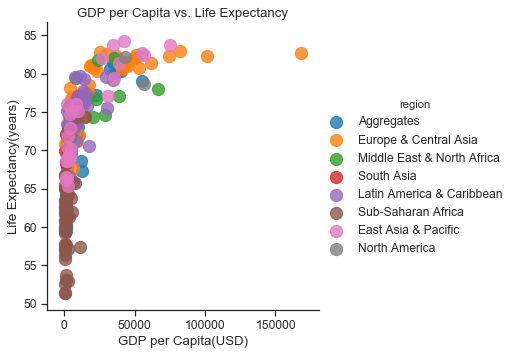

In [2]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('GDP_per_capita', # Horizontal axis
           'life_expectancy', # Vertical axis
           data=indicator2, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="region", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 150}) # S marker size

# Set title
plt.title('GDP per Capita vs. Life Expectancy')

# Set x-axis label
plt.xlabel('GDP per Capita(USD)')

# Set y-axis label
plt.ylabel('Life Expectancy(years)')

<Figure size 720x576 with 0 Axes>

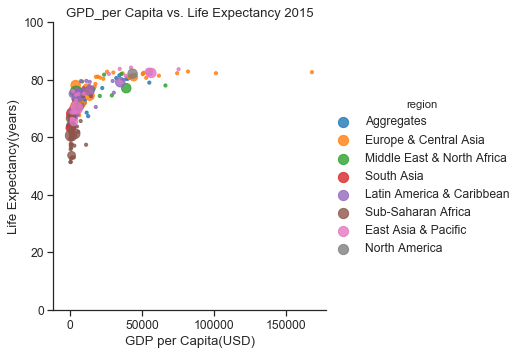

In [3]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sizes = [10, 60, 90, 130, 200] 
marker_size = pd.cut(indicator2['population_total']/1000000, [0, 100, 200, 400, 600, 800], labels=sizes) 
sns.lmplot('GDP_per_capita', 'life_expectancy', data=indicator2, hue='region', fit_reg=False, scatter_kws={'s':marker_size})
plt.title('GPD_per Capita vs. Life Expectancy 2015')
plt.xlabel('GDP per Capita(USD)')
plt.ylabel('Life Expectancy(years)')
plt.ylim((0, 100))
plt.savefig('sns.png')

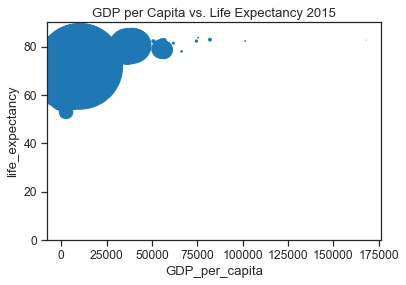

In [4]:
indicator2.plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', s = indicator2['population_total']/1000000, 
                title = 'GDP per Capita vs. Life Expectancy 2015', ylim=(0,90))
plt.savefig('base_pandas.png')

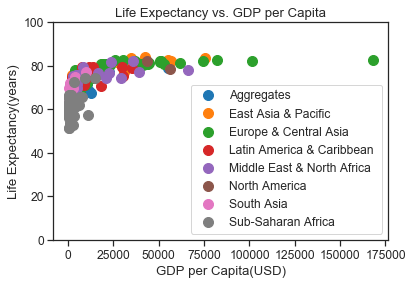

In [5]:
fig, ax = plt.subplots()
groups = indicator2.groupby('region')
for name, group in groups:
    ax.plot(group.GDP_per_capita, group.life_expectancy, marker='o', linestyle='', ms=10,
label=name)
ax.legend(numpoints=1)
ax.set_ylim((0, 100))
plt.ylabel('Life Expectancy(years)')
plt.xlabel('GDP per Capita(USD)')
plt.title('Life Expectancy vs. GDP per Capita')
plt.savefig('base_pandas.png')

In [6]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Axis
from bokeh.layouts import layout, widgetbox
from bokeh.io import output_notebook
from bokeh.palettes import Category20c
from bokeh.models.widgets import Slider, Select, TextInput

colors = Category20c[8]

p = figure(plot_width=400, plot_height=400,title="GDP per Capita vs. Life Expectancy 2015")
p.scatter(indicator2['GDP_per_capita'], indicator2['life_expectancy'],color=colors)


output_notebook()

show(p)

Loading BokehJS ...

In [7]:
import plotly
plotly.__version__

'3.4.2'

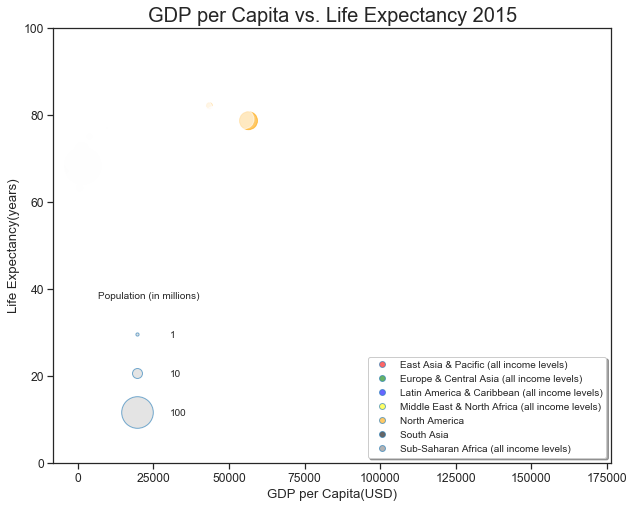

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
indicator2 = pd.read_csv('data/indicator2.csv')

plt.figure(figsize=(10,8))
colors = ("red", "green", "blue", "yellow", "orange", "black", "gray")

def attribute_color(region):
    colors = {
        'East Asia & Pacific (all income levels)':'red',
        'Europe & Central Asia (all income levels)':'green',
        'Latin America & Caribbean (all income levels)':'blue',
        'Middle East & North Africa (all income levels)':'yellow',
        'North America':'orange', 
        'South Asia':'black', 
        'Sub-Saharan Africa (all income levels)':'gray'
    }
    return colors.get(region, 'white')
color_region = list()
qty_states = len(indicator2['region'])
 
for state in range(qty_states):
    color_region.append(attribute_color(indicator2['region'][state]))
plt.scatter(x = indicator2['GDP_per_capita'],
            y = indicator2['life_expectancy'],
            s = indicator2['population_total']/1000000,
            c = color_region,
            alpha = 0.6)
plt.title('GDP per Capita vs. Life Expectancy 2015', fontsize=20)
plt.xlabel('GDP per Capita(USD)')
plt.ylabel('Life Expectancy(years)')
plt.ylim(0, 100)

regions = ['East Asia & Pacific (all income levels)', 'Europe & Central Asia (all income levels)', 'Latin America & Caribbean (all income levels)', 
           'Middle East & North Africa (all income levels)', 'North America', 'South Asia', 'Sub-Saharan Africa (all income levels)']

 
legend1_line2d = list()
for step in range(len(colors)):
    legend1_line2d.append(mlines.Line2D([0], [0],
                                        linestyle='none',
                                        marker='o',
                                        alpha=0.6,
                                        markersize=6,
                                        markerfacecolor=colors[step]))
legend1 = plt.legend(legend1_line2d,
                     regions,
                     numpoints=1,
                     fontsize=10,
                     loc='lower right',
                     shadow=True)

legend2_line2d = list()
legend2_line2d.append(mlines.Line2D([0], [0],
                                    linestyle='none',
                                    marker='o',
                                    alpha=0.6,
                                    markersize=np.sqrt(10),
                                    markerfacecolor='#D3D3D3'))
legend2_line2d.append(mlines.Line2D([0], [0],
                                    linestyle='none',
                                    marker='o',
                                    alpha=0.6,
                                    markersize=np.sqrt(100),
                                    markerfacecolor='#D3D3D3'))
legend2_line2d.append(mlines.Line2D([0], [0],
                                    linestyle='none',
                                    marker='o',
                                    alpha=0.6,
                                    markersize=np.sqrt(1000),
                                    markerfacecolor='#D3D3D3'))
 
legend2 = plt.legend(legend2_line2d,
                     ['1', '10', '100'],
                     title='Population (in millions)',
                     numpoints=1,
                     fontsize=10,
                     loc='lower left',
                     frameon=False,  # no edges
                     labelspacing=3, # increase spacing between labels
                     handlelength=5, # increase spacing between objects and text
                     borderpad=4     # increase the margins of the legend
                    )
plt.gca().add_artist(legend1)
 
plt.setp(legend2.get_title(),fontsize=10)
plt.savefig('matplotlib.png')

In [9]:
from bokeh.plotting import figure, output_notebook, show
p = figure()
p.circle(indicator2['GDP_per_capita'], indicator2['life_expectancy'], size=indicator2['population_total']/100000000, 
         color=indicator2['region'], alpha=0.5)
output_notebook()
show(p)

Loading BokehJS ...